<font size="4" style="color:red;"> **IMPORTANT: ** Only modify cells which have the following comment</font>

```python
# modify this cell
```

<font style="color:red;"> Do not add any new cells when submitting homework. To test out new code, use the coding **scratchpad** by clicking the triangular icon in the bottom right corner of the screen. (**hotkey:** control-B)  </font>



# Regression to the mean

Students take a standard exam at two time points. Getting two grades.

If the 1'st grade is <font style="color:red;">higher</font> than the average, the 2'nd grade will tend to be <font style="color:blue;">lower</font> than the 1'st.

If the 1'st grade is <font style="color:blue;">lower</font> than the average, the 2'nd grade will tend to be <font style="color:red;">higher</font> than the 1'st.

This happens even if the two grades are **statistically independent**.

This is called **regression to the mean**

In [1]:
%pylab inline
import pandas as pd
import numpy as np
from numpy import arange,array,ones,linalg

Populating the interactive namespace from numpy and matplotlib


This notebook is a an intuitive introduction to the concept of linear regression. Partially based on Chapter 10 in the book [**Statistics** by Freedman, Pisani and Purves](https://www.amazon.com/Statistics-4th-David-Freedman/dp/0393929728) 

## Fathers and Sons

A classical example of regression to the mean involves the height of fathers and sons.

We take our data from here http://www.math.uah.edu/stat/data/Pearson.html

In [2]:
HH=pd.read_csv('../data/Pearson.csv')
HH.head()

,Father,Son
0,65.0,59.8
1,63.3,63.2
2,65.0,63.3
3,65.8,62.8
4,61.1,64.3


In [3]:
# Compute some basic descritive statistics.
HH.describe()

,Father,Son
count,1078.000000,1078.000000
mean,67.686827,68.684230
std,2.745827,2.816194
min,59.000000,58.500000
25%,65.800000,66.900000
50%,67.800000,68.600000
75%,69.600000,70.500000
max,75.400000,78.400000


In [10]:
A=np.array(HH['Father'])
A=np.array([ones(len(A)),A])
y=np.array(HH['Son'])
A.shape,y.shape

w1 = linalg.lstsq(A.T,y)[0] # finding the optimal parameters
print "The regression function from father's height to to son's height is"
print "son's height = %f + %f * father's height"%(w1[0],w1[1])

The regression function from father's height to to son's height is
son's height = 33.892801 + 0.514006 * father's height


In [5]:
def f(x,w):
    return w[0]+w[1]*x

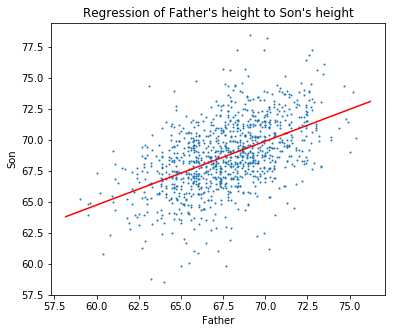

In [18]:
ax=HH.plot(kind='scatter',s=1,x='Father',y='Son',figsize=[6,5]);
x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w1),f(x1,w1)],'r');
title("Regression of Father's height to Son's height");

Note that as father's height varies from 58" to 77" the son's height varies only from 63" to 72"

In [14]:
HH['Son-Father']=HH['Son']-HH['Father']

In [15]:
A=np.array(HH['Father'])
A=np.array([ones(len(A)),A])
y=np.array(HH['Son-Father'])
A.shape,y.shape

w2 = linalg.lstsq(A.T,y)[0] # finding the optimal parameters
w2

array([ 33.89280054,  -0.48599409])

## Consider the difference

Regression to the mean is even more evident when we compare the height of the father to the **difference** between the heights of the son and the father.

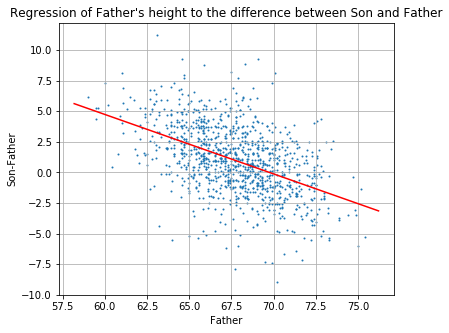

In [19]:
ax=HH.plot(kind='scatter',s=1,x='Father',y='Son-Father',figsize=[6,5]);
x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w2),f(x1,w2)],'r');
grid()
title("Regression of Father's height to the difference between Son and Father");

## Conclusions

Suppose you have a pair of IID random variables $X_1,X_2$. If you select pairs $x_1,x_2$ such that $x_1$ is far from the mean of the distribution, then $x_2$ for those pairs will tend to be closer to the mean. 

# Excercises

It is now your turn to do regression on a dataset. Consider $1000$ datapoints with random variables $x$ and $y$ both sampled from a normal (gaussian) distribution:
$$ x,y \text{ ~ } \mathcal{N}(0,1)  $$

Notice that the graph below looks like a blob, with no clear relationship between  $x$ and $y$. This leads intuitively to the idea that $x$ and $y$ are independent from each other. In this particualr case (not always true) this intuition is correct, $x$ and $y$ are mathematically independent variables.

If we were to try to perform linear regression on this data (the <font style="color:red">red line</font>), we would find rather boring results:
$$ y = 0 + 0 \cdot x = 0 $$

This is due to the fact that $y$ has mean 0 and is independent of $x$. What do you think would happen if we did:
$$ y-x = w_0 + w_1 \cdot x $$

Is $y$ independent of $x$? Will the graph look like a blob? Will $y-x = 0 ?$ Lets find out!

In [ ]:
HW=pd.read_csv('../data/hw/gauss_R2.csv')

ax= HW.plot(kind='scatter',s=1.4,x="x",y="y");
x0,x1=xlim()
ax.plot([x0,x1],[0,0],'r');


## Exercise 1: Put $\;y-x\;$ in Dataframe

This first exercise's goal is to familarize you with the [pandas](http://pandas.pydata.org/pandas-docs/version/0.15.2/tutorials.html) package.

Your task is to make a new column on the pandas dataframe `HW` where each element of the new column is equal to $y-x$. Write a function **y_minus_x** that will create the new column, make sure the column's name is "y-x" . Notice that the function DOES NOT return any output, this is because the `HW` dataframe will be edited "in-place".

<font  style="color:blue"> * **Code:** *</font>
```python
print y_minus_x(HW)
print HW.shape
print HW.columns
HW.head()
```

<font  style="color:magenta"> * **Output:** *</font>
```
None
(1000, 3)
Index([u'x', u'y', u'y-x'], dtype='object')
```
<img src="../data/hw/reg_mean_pic.png"  style="width: 220px;"/>

In [ ]:
def y_minus_x(HW):
    # input: the HW's dataset
    # output: there is NO OUTPUT
    
    ### BEGIN SOLUTION
    HW["y-x"] = HW["y"] - HW["x"]
    ### END SOLUTION

In [ ]:

# Check Answer
HW=pd.read_csv('../data/hw/gauss_R2.csv')
assert y_minus_x(HW) == None 
assert HW.shape == (1000, 3)
assert all( HW.columns.values == array(['x', 'y', 'y-x']) )
assert sum(abs( array(HW["y-x"])[0:10] - \
               array([0.36236278,-2.37726552,-0.36501525,0.05449746,-0.27705517,1.80807383,-2.07001209,
                      -0.67536514,0.67519959,  0.97277652])   )) < 10**-5

# Create Graph
ax= HW.plot(kind='scatter',s=1.4,x="x",y="y-x",figsize=[10,8]);

### BEGIN HIDDEN TESTS
assert sum(abs( array(HW["y-x"])[60:70] - \
                array([-1.46231473, -0.35256032,  0.50213927, -2.98962366, -1.98911633,
                       1.19767907, -0.2104474 ,  1.71587283,  1.50967089, -0.37887511])    )) < 10**-5
### END HIDDEN TESTS

Notice in the graph that there is a clear negative relationship between $y-x$ and $x$. As you might have guessed, $y-x$ and $x$ are NOT independent. 

We can use linear regression to find the relationship between $y-x$ and $x$ but before we do that, we can derive this mathematicaly. Remember from before, we showed:
$$ y = 0 + 0 \cdot x $$

Now, we're doing linear regression to find:
$$ \;\;\;\;\;\;y-x = w_0 + w_1 \cdot x $$
$$ \iff y = w_0 + (1+w_1) \cdot x $$

Comparing the two eqations for $y$, you can deduce that $w_0=0$ and $w_1=-1$ . Now lets see how close our sampled data is to the true equation for the distribution!

$\;$
<font style="color:red">*Technical Note:*</font> The derivation is mathematically sound only because $y-x$ is also a gaussian random variable. The sum of two gaussians is a gaussian. Under the laws of linear regression this ensures both the regressors of $y$ and $y-x$ have zero expected error.

## Exercise 2: Simple Linear Regression

Write a function, **do_regression**, that performs linear regression to return 
$ \;
 {\bf w} = \begin{pmatrix}
 w_0\\
 w_1
 \end{pmatrix}
$
for the equation:

$$
\text{y-x}= w_0 + w_1 \cdot \text{x}
$$


<font  style="color:blue"> * **Code:** *</font>
```python
w = do_regression(HW)
print type(w)
print w.shape
```

<font  style="color:magenta"> * **Output:** *</font>
```
<type 'numpy.ndarray'>
(2,)
```


In [ ]:
# modify this cell

def do_regression(HW):
    # input: the HW's dataset
    # output: a numpy array yielding w=(w0,w1) from linear regression
    
    ### BEGIN SOLUTION
    A= array(HW['x'])
    A= array([ones(len(A)),A])
    y= array(HW['y-x'])
    return linalg.lstsq(A.T,y)[0]
    ### END SOLUTION

In [ ]:
# Check Answer
w_hw = do_regression(HW)
assert str(type(w_hw)) == "<type 'numpy.ndarray'>"
assert w_hw.shape == (2,)
assert sum(abs(w_hw[0] - 0.02173387)) < 10**-5

# Plot Graph
print "LINEAR REGRESSION EQUATION:"
print "y-x = {:.2f} + {:.2f} x".format(w_hw[0],w_hw[1])
ax= HW.plot(kind='scatter',s=1.4,x="x",y="y-x",figsize=[10,8]);
x0,x1=xlim()
ax.plot([x0,x1],[f(x0,w_hw),f(x1,w_hw)],'k');

### BEGIN HIDDEN TESTS
assert sum(abs(w_hw[1] - -1.01071279)) < 10**-5
### END HIDDEN TESTS
